In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [18]:
data = pd.read_csv("Train_data.csv")
data

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,anomaly
3,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25187,0,tcp,exec,RSTO,0,0,0,0,0,0,...,7,0.03,0.06,0.00,0.00,0.00,0.00,1.00,1.00,anomaly
25188,0,tcp,ftp_data,SF,334,0,0,0,0,0,...,39,1.00,0.00,1.00,0.18,0.00,0.00,0.00,0.00,anomaly
25189,0,tcp,private,REJ,0,0,0,0,0,0,...,13,0.05,0.07,0.00,0.00,0.00,0.00,1.00,1.00,anomaly
25190,0,tcp,nnsp,S0,0,0,0,0,0,0,...,20,0.08,0.06,0.00,0.00,1.00,1.00,0.00,0.00,anomaly


# A1

In [24]:
import math
def entropy(data):
    total_count = len(data)
    yes_count = len(data[data['buys_computer'] == 'yes'])
    no_count = len(data[data['buys_computer'] == 'no'])
    if yes_count == 0 or no_count == 0:
        return 0 

    p_yes = yes_count / total_count
    p_no = no_count / total_count

    entropy = -p_yes * math.log2(p_yes) - p_no * math.log2(p_no)
    return entropy

entropy_root = entropy(data)


def information_gain(data, attribute):
    unique_values = data[attribute].unique()
    weighted_entropy = 0

    for value in unique_values:
        subset = data[data[attribute] == value]
        weight = len(subset) / len(data)
        weighted_entropy += weight * entropy(subset)

    info_gain = entropy_root - weighted_entropy
    return info_gain

attributes = ['age', 'income', 'student', 'credit_rating']
info_gains = {attribute: information_gain(data, attribute) for attribute in attributes}

best_attribute = max(info_gains, key=info_gains.get)
print("Information Gains:", info_gains)
print("Best Attribute for Root Node:", best_attribute)

Information Gains: {'age': 0.24674981977443933, 'income': 0.02922256565895487, 'student': 0.15183550136234159, 'credit_rating': 0.1299303895316022}
Best Attribute for Root Node: age


# A2

In [22]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Load the data
data = pd.read_excel('entropy_4.xlsx')

# Split the data into features (X) and the target variable (y)
X = data.drop(columns=['buys_computer'])
y = data['buys_computer']

# Define which features are categorical (non-numeric)
categorical_features = ['age', 'income', 'student', 'credit_rating']

# Create a preprocessor for one-hot encoding
preprocessor = ColumnTransformer(
    transformers=[('cat', OneHotEncoder(), categorical_features)],
    remainder='passthrough'  # Pass through non-categorical features as-is
)

# Create a pipeline that includes preprocessing and the DecisionTreeClassifier
model = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', DecisionTreeClassifier())
])

# Fit the model to the data
model.fit(X, y)

# Get the depth of the constructed tree
tree_depth = model.named_steps['classifier'].get_depth()

# Print the depth of the tree
print("Tree Depth:", tree_depth)

Tree Depth: 4


# A3

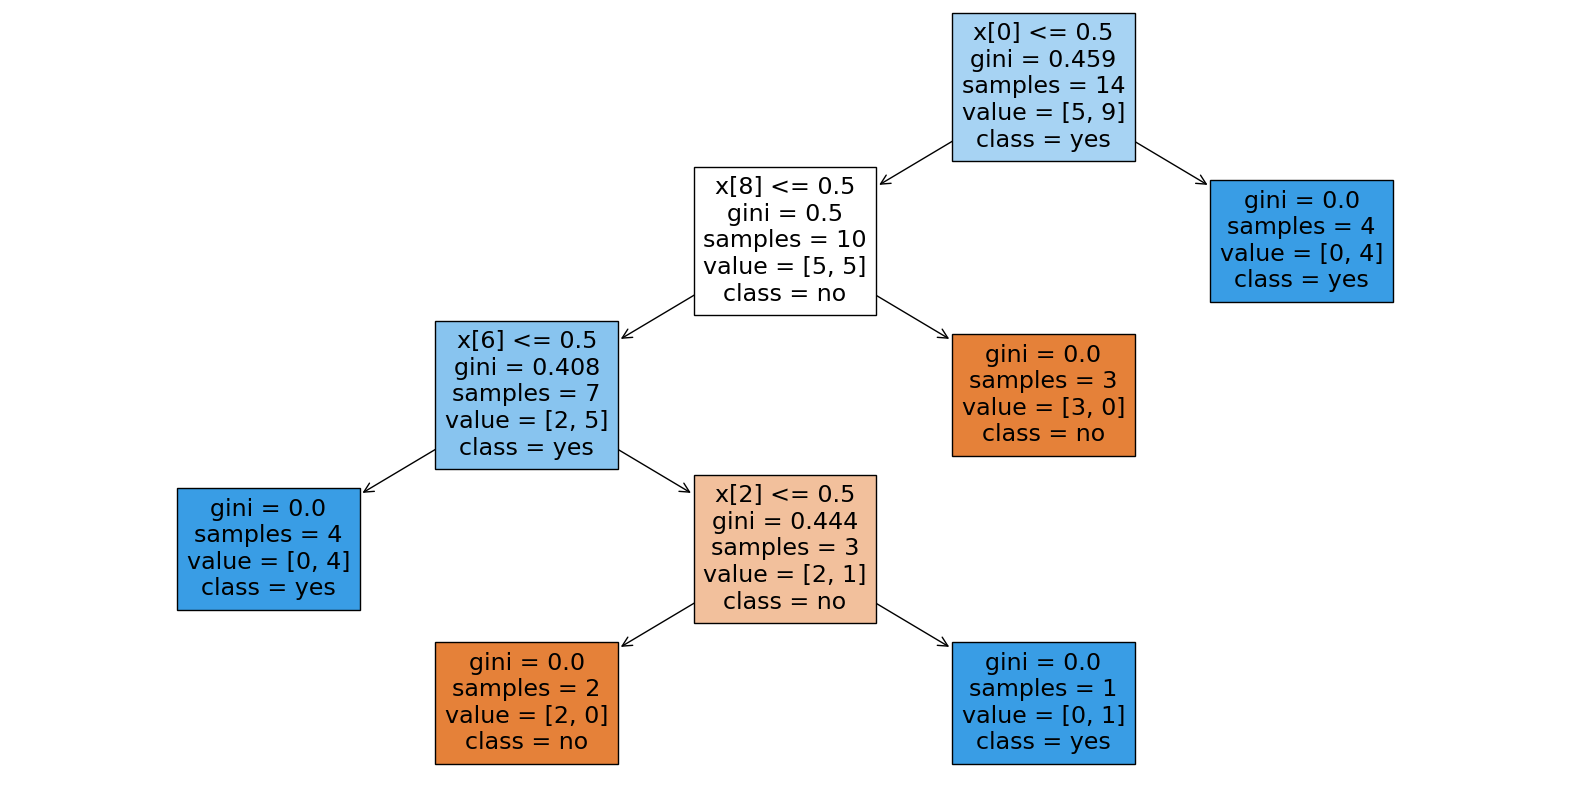

In [23]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Create a figure and set its size
plt.figure(figsize=(20, 10))

# Visualize the constructed tree without specifying feature_names
plot_tree(model.named_steps['classifier'], filled=True, class_names=['no', 'yes'])

# Show the tree plot
plt.show()

# A4

In [5]:
from sklearn.model_selection import train_test_split as tts
from sklearn.preprocessing import OneHotEncoder as ohe

x = data.loc[:, "duration":"dst_host_srv_rerror_rate"]
y = data["class"]
x_train, x_test, y_train, y_test = tts(x, y, test_size = 0.25, random_state = 0)

catg_cols = ["protocol_type", "service", "flag"]
encoder = ohe(sparse=False, drop='first')

x_train_encoded = encoder.fit_transform(x_train[catg_cols])
x_train = x_train.drop(columns = catg_cols)
x_train = np.hstack((x_train, x_train_encoded))

x_test_encoded = encoder.transform(x_test[catg_cols])
x_test = x_test.drop(columns = catg_cols)
x_test = np.hstack((x_test, x_test_encoded))

C:\Users\Sanjana Chowdary\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Training data accuracy =  0.9999470731449137
Testing data accuracy =  0.9960304858685297


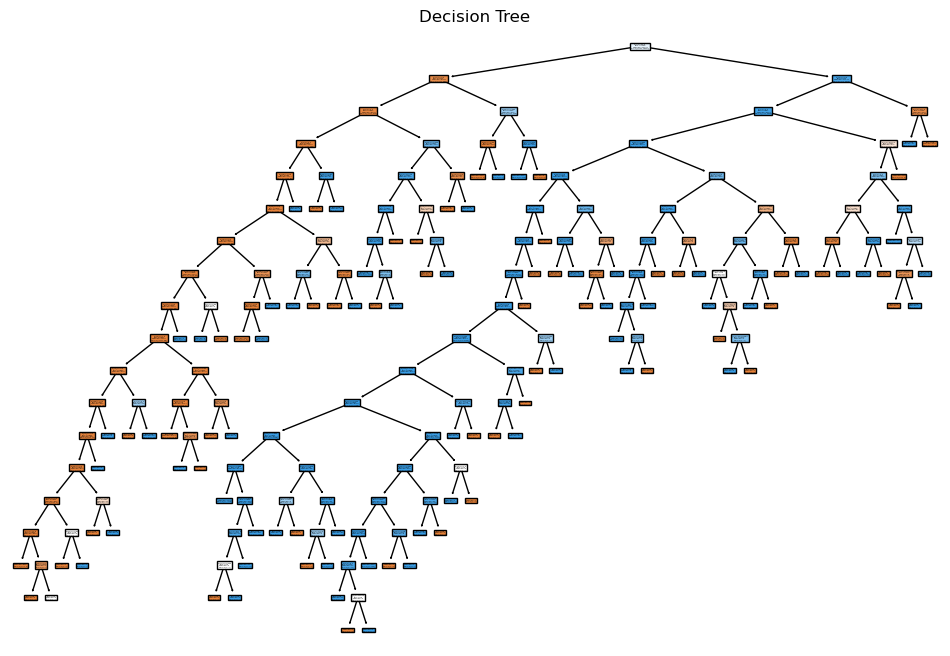

In [6]:
from sklearn.tree import DecisionTreeClassifier as dtc
from sklearn import tree

model = dtc()
model = model.fit(x_train,y_train)

print("Training data accuracy = ", model.score(x_train, y_train))
print("Testing data accuracy = ", model.score(x_test, y_test))

plt.figure(figsize=(12, 8))
tree.plot_tree(model, filled = True)
plt.title("Decision Tree")
plt.show()

# A5

Training data accuracy =  0.9889382872869694
Testing data accuracy =  0.9888853604318831


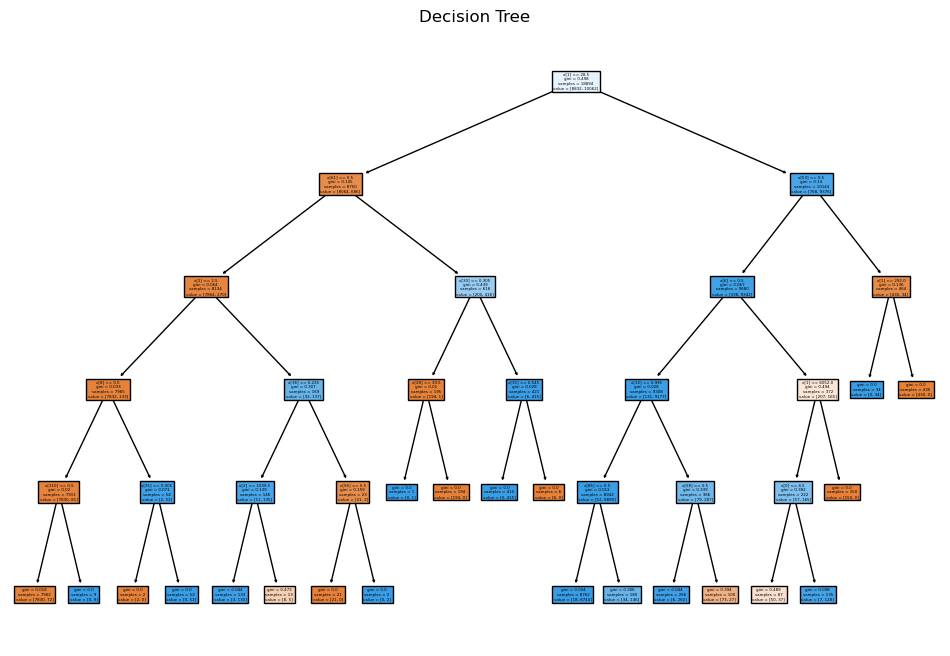

In [7]:
from sklearn.tree import DecisionTreeClassifier as dtc
from sklearn import tree

model = dtc(max_depth = 5)
model = model.fit(x_train,y_train)

print("Training data accuracy = ", model.score(x_train, y_train))
print("Testing data accuracy = ", model.score(x_test, y_test))

plt.figure(figsize=(12, 8))
tree.plot_tree(model, filled = True)
plt.title("Decision Tree")
plt.show()

# A6

Training Set Accuracy =  0.9999470731449137
Test Set Accuracy =  0.9968243886948237


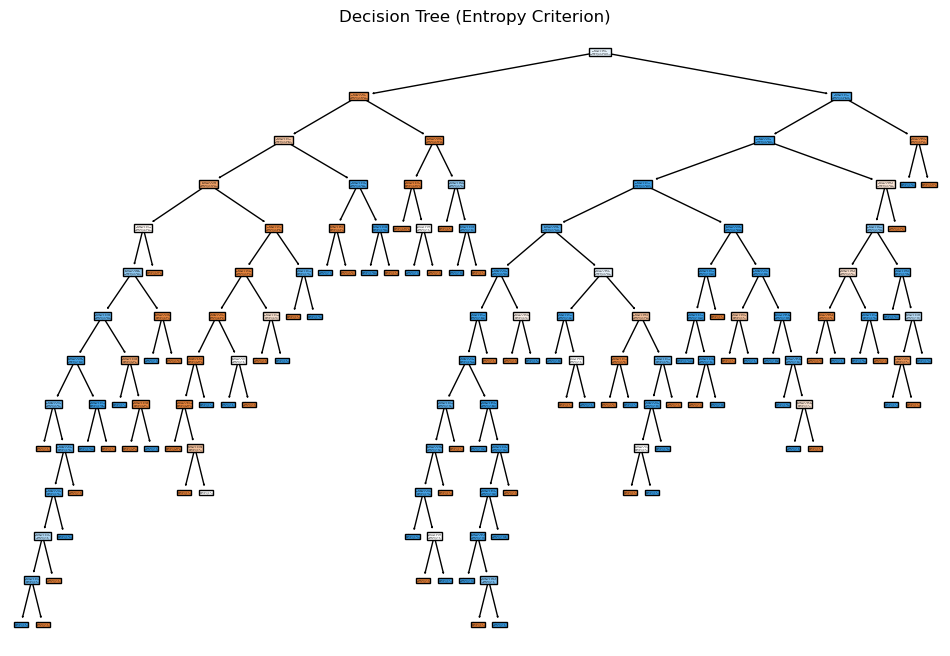

In [8]:
model_entropy = dtc(criterion="entropy")
model_entropy.fit(x_train, y_train)

print("Training Set Accuracy = ", model_entropy.score(x_train, y_train))
print("Test Set Accuracy = ", model_entropy.score(x_test, y_test))

plt.figure(figsize=(12, 8))
tree.plot_tree(model_entropy, filled=True)
plt.title("Decision Tree (Entropy Criterion)")
plt.show()

# A7

In [29]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Load your dataset
data = pd.read_csv('Train_data.csv')

# Encode categorical variables if needed
encoder = LabelEncoder()
data['protocol_type'] = encoder.fit_transform(data['protocol_type'])
data['service'] = encoder.fit_transform(data['service'])
data['flag'] = encoder.fit_transform(data['flag'])
data['class'] = encoder.fit_transform(data['class'])

# Split the data into features and target variable
X = data.drop('class', axis=1)  # Features
y = data['class']  # Target variable

# Split the data into a training set and a testing/validation set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Create and train a decision tree classifier
decision_tree = DecisionTreeClassifier(random_state=42)
decision_tree.fit(X_train, y_train)

# Make predictions on the test set
y_pred_dt = decision_tree.predict(X_test)

# Evaluate the decision tree model
accuracy_dt = accuracy_score(y_test, y_pred_dt)
precision_dt = precision_score(y_test, y_pred_dt)
recall_dt = recall_score(y_test, y_pred_dt)
f1_score_dt = f1_score(y_test, y_pred_dt)
confusion_matrix_dt = confusion_matrix(y_test, y_pred_dt)

# Print or analyze the performance metrics for the decision tree
print(" Decision Tree Classifier")
print(f"accuracy: {accuracy_dt:.4f}")
print(f"Precision: {precision_dt:.4f}")
print(f"Recall: {recall_dt:.4f}")
print(f"F1-Score: {f1_score_dt:.4f}")
confusion_matrix_train = confusion_matrix(y_test, y_pred_dt)
print("\nConfusion Matrix (Train Data):")
print(confusion_matrix_train)



from sklearn.ensemble import RandomForestClassifier

# Create and train a random forest classifier
random_forest = RandomForestClassifier(random_state=42)
random_forest.fit(X_train, y_train)

# Make predictions on the test set
y_pred_rf = random_forest.predict(X_test)

# Evaluate the random forest model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_score_rf = f1_score(y_test, y_pred_rf)
confusion_matrix_rf = confusion_matrix(y_test, y_pred_rf)

# Print or analyze the performance metrics for the random forest
print(" Random forest classifier :")
print(f"accuracy: {accuracy_rf:.4f}")
print(f"Precision: {precision_rf:.4f}")
print(f"Recall: {recall_rf:.4f}")
print(f"F1-Score: {f1_score_rf:.4f}")
confusion_matrix_train = confusion_matrix(y_test, y_pred_rf)
print("\nConfusion Matrix (Train Data):")
print(confusion_matrix_train)

if ((precision_rf >= precision_dt) & (recall_rf >= recall_dt) & (f1_score_rf >= f1_score_dt) & (accuracy_rf >= accuracy_dt)):
    print("\n Random forest performance is better")
else:
    print("\n Decision tree performance is better.")

 Decision Tree Classifier
accuracy: 0.9958
Precision: 0.9966
Recall: 0.9955
F1-Score: 0.9961

Confusion Matrix (Train Data):
[[2356    9]
 [  12 2662]]
 Random forest classifier :
accuracy: 0.9978
Precision: 0.9974
Recall: 0.9985
F1-Score: 0.9979

Confusion Matrix (Train Data):
[[2358    7]
 [   4 2670]]

 Random forest performance is better


# A8

In [ ]:
The various parameters and model attributes of a Random Forest classifier is crucial to fine-tune its
behavior and optimize its performance. 
1.  Number of Trees
2.  Max Depth 
3. Minimum Samples to Split
4.  Minimum Samples per Leaf
5.  Maximum Features 